In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#define model
model=Sequential([Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),MaxPooling2D((2,2)),Dropout(0.25),Flatten(),Dense(128,activation='relu'),Dropout(0.5),Dense(10,activation='softmax')])
#define optimizer and loss fun
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#train model
history=model.fit(x_train,y_train,batch_size=128,epochs=15,validation_split=0.2,verbose=1)
#find loss and accuracy
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose='2')
print(f'Loss :{test_loss}\n Accuracy:{test_accuracy}')

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8018 - loss: 0.6410 - val_accuracy: 0.9678 - val_loss: 0.1127
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9505 - loss: 0.1628 - val_accuracy: 0.9778 - val_loss: 0.0781
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 76ms/step - accuracy: 0.9641 - loss: 0.1175 - val_accuracy: 0.9815 - val_loss: 0.0655
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9722 - loss: 0.0942 - val_accuracy: 0.9830 - val_loss: 0.0579
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9748 - loss: 0.0830 - val_accuracy: 0.9852 - val_loss: 0.0518
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9790 - loss: 0.0669 - val_accuracy: 0.9850 - val_loss: 0.0526
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9794 - loss: 0.0655 - val_accuracy: 0.9869 - val_loss: 0.0477
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9808 - loss: 0.0605 - 

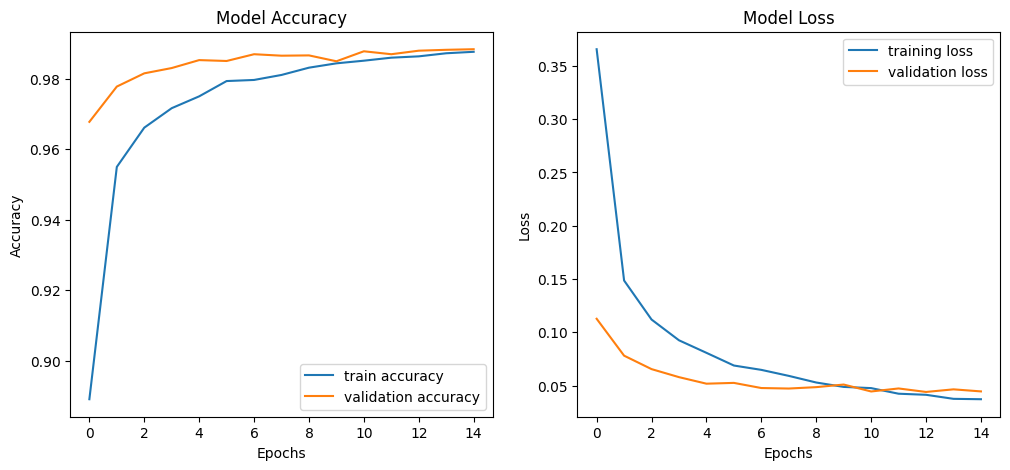

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual Label: 4
Predicted Label: 4


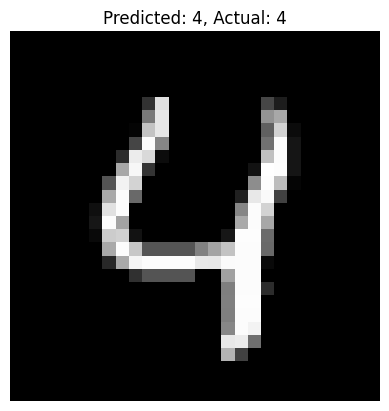

In [47]:
image_index = 4  # You can change this to test different images
image = x_test[image_index]
label = np.argmax(y_test[image_index])

# Predict the class of the selected image
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)

# Print the results
print(f"Actual Label: {label}")
print(f"Predicted Label: {predicted_class}")

# Optionally, plot the image
import matplotlib.pyplot as plt
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {label}")
plt.axis('off')
plt.show()